In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

/Users/rajegupt/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [39]:
import seaborn as sns
import re
import random
plt.style.use('ggplot')

In [28]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
english_stemmer=SnowballStemmer('english')

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
# Pick randomly 20000 reviews

n = 413000  
s = 20000 
skip = sorted(random.sample(range(1,n),n-s))

df = pd.read_csv("Amazon_Unlocked_Mobile.csv", skiprows=skip)

In [41]:
df.shape

(20840, 6)

In [42]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,2,"This phone is trapped in 2001, if you want a s...",0.0
1,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,1,Incredible! This phone does not have Splaniish...,0.0
2,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,1,The battery died in less than 24/hours....,0.0
3,"(LANDVO) 5.0"" Capacitive Touch MTK6582 Quad Co...",HTM,69.99,5,very responsible seller and excellent product,0.0
4,[XMAS DEAL] Jethro [SC118] Simple Unlocked Qua...,Jethro,59.99,5,Great phone!,0.0


In [43]:
data= df[['Reviews','Rating']]

In [44]:
data.isnull().any()

Reviews     True
Rating     False
dtype: bool

In [45]:
data.isnull().values.sum()

2

In [46]:
data = data[data['Reviews'].isnull()==False]

In [47]:
#df=df.dropna()
data.shape

(20838, 2)

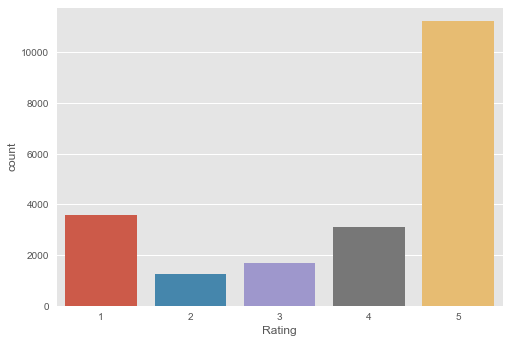

In [48]:
sns.countplot(data['Rating'])

In [49]:
print (data[data['Rating']==5].count())
print (data[data['Rating']<5].count())

Reviews    11241
Rating     11241
dtype: int64
Reviews    9597
Rating     9597
dtype: int64


In [54]:
data.Reviews[0]

"This phone is trapped in 2001, if you want a simple phone get an old school flip phone. If you want something also for work get a blackberry or somthing new. This isn't even in the middle of those two, it's in another dimension. Nothing but frustration with this phone."

In [53]:
# Remove HTML
review_text= BeautifulSoup(data.Reviews[0]).get_text()
print (review_text)

This phone is trapped in 2001, if you want a simple phone get an old school flip phone. If you want something also for work get a blackberry or somthing new. This isn't even in the middle of those two, it's in another dimension. Nothing but frustration with this phone.


/Users/rajegupt/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/rajegupt/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [58]:
# 2. Remove non-letters
review_text = re.sub("[^a-zA-Z]"," ", review_text)
print (review_text)

This phone is trapped in       if you want a simple phone get an old school flip phone  If you want something also for work get a blackberry or somthing new  This isn t even in the middle of those two  it s in another dimension  Nothing but frustration with this phone 


In [59]:
# 3. Convert words to lower case and split them
words = review_text.lower().split()
print (words)

['this', 'phone', 'is', 'trapped', 'in', 'if', 'you', 'want', 'a', 'simple', 'phone', 'get', 'an', 'old', 'school', 'flip', 'phone', 'if', 'you', 'want', 'something', 'also', 'for', 'work', 'get', 'a', 'blackberry', 'or', 'somthing', 'new', 'this', 'isn', 't', 'even', 'in', 'the', 'middle', 'of', 'those', 'two', 'it', 's', 'in', 'another', 'dimension', 'nothing', 'but', 'frustration', 'with', 'this', 'phone']


In [62]:
# 4. Remove Stopwords
stops = set(stopwords.words("english"))
words = [w for w in words if not w in stops]

print (stops)
print (" \nwords after removing stopwords\n")
print (words)

{'didn', 'i', 'while', 's', 'your', 'd', 'weren', 'yourself', 'very', 'myself', 'me', 'whom', 'o', 'theirs', 'when', 'with', 'that', 'down', 'themselves', 'not', 're', 'who', 'up', 'other', 'its', 'so', 'y', 'too', 'just', 'further', 'do', 'own', 'the', 'aren', 'or', 'doesn', 'wasn', 'herself', 'itself', 'hadn', 'should', 'of', 'both', 'hers', 'off', 'ourselves', 'him', 'through', 'in', 'ain', 'having', 'to', 'where', 'only', 'by', 'himself', 'no', 'below', 'mightn', 'against', 'under', 'about', 'why', 'which', 'this', 'on', 'them', 'same', 'are', 'into', 'does', 've', 'won', 'm', 'were', 'most', 'from', 'and', 'those', 'nor', 'they', 'because', 'more', 'll', 'some', 'once', 'yourselves', 'such', 'it', 'wouldn', 'being', 'couldn', 'been', 't', 'we', 'after', 'again', 'am', 'she', 'shan', 'my', 'isn', 'over', 'as', 'don', 'doing', 'had', 'than', 'how', 'before', 'yours', 'her', 'but', 'for', 'an', 'was', 'hasn', 'few', 'each', 'our', 'can', 'there', 'during', 'out', 'these', 'be', 'a', 

In [64]:
# 5. Stem the words

stemmer = english_stemmer
b=[]
for word in words:
    b.append(stemmer.stem(word))
print (b)

['phone', 'trap', 'want', 'simpl', 'phone', 'get', 'old', 'school', 'flip', 'phone', 'want', 'someth', 'also', 'work', 'get', 'blackberri', 'somth', 'new', 'even', 'middl', 'two', 'anoth', 'dimens', 'noth', 'frustrat', 'phone']


In [55]:
# Write all the steps in one function now

def review_to_wordlist( review, remove_stopwords=True):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()

    #
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (True by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    b=[]
    stemmer = english_stemmer #PorterStemmer()
    for word in words:
        b.append(stemmer.stem(word))

    # 5. Return a list of words
    return(b)

In [56]:
train, test = train_test_split(data, test_size = 0.3)

In [57]:
# Clean all the reviews

clean_train_reviews = []
for review in train['Reviews']:
    clean_train_reviews.append( " ".join(review_to_wordlist(review)))
    
clean_test_reviews = []
for review in test['Reviews']:
    clean_test_reviews.append( " ".join(review_to_wordlist(review)))

/Users/rajegupt/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/rajegupt/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))
/Users/rajegupt/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "https://www.amazon.com/dp/B00K15KRV6/ref=cm_cr_ryp_prd_ttl_sol_22" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that docu

In [65]:
clean_train_reviews[0:5]

['good cellphon',
 'great phone great price tough economi wise save money spend phone brand logo blu give high perform android smartphon give freedom use compani want sinc unlock',
 'phone year one final broke drop open split right half got anoth one year good lifespan phone',
 'love phone sent back exchang one problem shut would sim soft ware problem second phone far gone day past first phone grade first time two phone problem shut',
 'phone abl updat app wi fi mobil network freez regular']

## TFidf Transformation

In [85]:
# use tfidf transformation with ngrams between 1 and 4.
vectorizer = TfidfVectorizer(min_df=2, max_df=0.95, max_features=200000,
                             ngram_range=(1,4), sublinear_tf=True)

vectorizer= vectorizer.fit(clean_train_reviews)
train_features= vectorizer.transform(clean_train_reviews)
test_features= vectorizer.transform(clean_test_reviews)

In [94]:
print (len(clean_train_reviews))
print (train_features.shape)
print ((clean_train_reviews[:1]))

14586
(14586, 71459)
['good cellphon']


In [77]:
print (train_features)

  (0, 23968)	0.803306941049
  (0, 23886)	0.25097393812
  (0, 9945)	0.540101880063
  (1, 69020)	0.170647151666
  (1, 67112)	0.0932975165442
  (1, 65292)	0.229222745161
  (1, 65110)	0.0687908721525
  (1, 64377)	0.0979619637985
  (1, 63143)	0.175911116035
  (1, 58434)	0.201854988086
  (1, 58407)	0.141560698955
  (1, 57236)	0.23638925254
  (1, 57189)	0.118697913566
  (1, 56440)	0.209021495465
  (1, 56317)	0.112298541118
  (1, 52897)	0.23638925254
  (1, 52893)	0.17380468952
  (1, 52869)	0.13538230095
  (1, 47260)	0.085978606046
  (1, 43491)	0.165810491187
  (1, 43457)	0.118771724601
  (1, 42515)	0.180747776514
  (1, 42135)	0.0698279864809
  (1, 41922)	0.122427684808
  (1, 36232)	0.215282040968
  :	:
  (14585, 20898)	0.102449791407
  (14585, 20822)	0.0917847183203
  (14585, 19237)	0.0884641512085
  (14585, 19213)	0.0728304389465
  (14585, 18639)	0.107051397401
  (14585, 17313)	0.0867000195775
  (14585, 15741)	0.0770789967739
  (14585, 15083)	0.0867000195775
  (14585, 13032)	0.0945127501657
 

###Select Best Features

In [95]:
fselect= SelectKBest(chi2, k=10000)
train_features = fselect.fit_transform(train_features, train['Rating'])
test_features= fselect.transform(test_features)

In [97]:
print (train_features.shape)

(14586, 10000)


In [105]:
model1 = MultinomialNB(alpha=0.001)
model1.fit( train_features, train["Rating"] )

model2 = SGDClassifier(loss='modified_huber', n_iter=5, random_state=0, shuffle=True)
model2.fit( train_features, train["Rating"] )

model3 = RandomForestClassifier()
model3.fit( train_features, train["Rating"] )

model4 = GradientBoostingClassifier()
model4.fit( train_features, train["Rating"] )

pred_1 = model1.predict( test_features.toarray() ) # to array is required to covert sparse matrix into an array
pred_2 = model2.predict( test_features.toarray() )
pred_3 = model3.predict( test_features.toarray() )
pred_4 = model4.predict( test_features.toarray() )

In [109]:
print(classification_report(test['Rating'], pred_1, target_names=['1','2','3','4','5']))

             precision    recall  f1-score   support

          1       0.64      0.70      0.67      1043
          2       0.47      0.11      0.18       401
          3       0.39      0.14      0.21       485
          4       0.34      0.17      0.23       904
          5       0.72      0.92      0.81      3419

avg / total       0.61      0.66      0.61      6252



In [106]:
print(classification_report(test['Rating'], pred_2, target_names=['1','2','3','4','5']))

             precision    recall  f1-score   support

          1       0.63      0.79      0.70      1043
          2       0.51      0.12      0.19       401
          3       0.44      0.12      0.18       485
          4       0.38      0.19      0.26       904
          5       0.74      0.93      0.83      3419

avg / total       0.63      0.68      0.63      6252



In [107]:
print(classification_report(test['Rating'], pred_3, target_names=['1','2','3','4','5']))

             precision    recall  f1-score   support

          1       0.56      0.71      0.63      1043
          2       0.56      0.13      0.21       401
          3       0.46      0.14      0.22       485
          4       0.39      0.15      0.22       904
          5       0.72      0.91      0.81      3419

avg / total       0.62      0.66      0.61      6252



In [108]:
print(classification_report(test['Rating'], pred_4, target_names=['1','2','3','4','5']))

             precision    recall  f1-score   support

          1       0.64      0.60      0.62      1043
          2       0.45      0.04      0.07       401
          3       0.42      0.06      0.10       485
          4       0.36      0.10      0.15       904
          5       0.67      0.97      0.79      3419

avg / total       0.59      0.65      0.57      6252



In [114]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test['Rating'], pred_2)
cnf_matrix

array([[ 819,   17,   12,   34,  161],
       [ 196,   47,   22,   32,  104],
       [ 132,   16,   56,   76,  205],
       [  67,    8,   29,  176,  624],
       [  87,    5,    8,  140, 3179]])

In [112]:
print('prediction 1 accuracy: ', accuracy_score(test['Rating'], pred_1))
print('prediction 2 accuracy: ', accuracy_score(test['Rating'], pred_2))
print('prediction 3 accuracy: ', accuracy_score(test['Rating'], pred_3))
print('prediction 4 accuracy: ', accuracy_score(test['Rating'], pred_4))

prediction 1 accuracy:  0.663467690339
prediction 2 accuracy:  0.684101087652
prediction 3 accuracy:  0.659628918746
prediction 4 accuracy:  0.650671785029
